In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data=pd.read_csv("/content/drive/MyDrive/animals (3).csv", header="infer")
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [22]:
# Replace specific 'Class' values with 'non-mammals'
data['Class'] = data['Class'].replace([4, 5, 6, 2], 'non-mammals')
print(data.head())

# Replace remaining 'Class' values with 'mammals'
data['Class'] = data['Class'].replace([1, 3, 7], 'mammals')
print(data.head())

   Sr   Hair   Feathers   Eggs   Milk   Airborne   Aquatic   Predator   Teeth  \
0   1      1          0      0      1          0         0          1       1   
1   2      1          0      0      1          0         0          0       1   
2   3      0          0      1      0          0         1          1       1   
3   4      1          0      0      1          0         0          1       1   
4   5      1          0      0      1          0         0          1       1   

    Backbone   Breathes   Venemous   Fins   Legs   Tails   Domestic   Catsize  \
0          1          1          0      0      4       0          0         1   
1          1          1          0      0      4       1          0         1   
2          1          0          0      1      0       1          0         0   
3          1          1          0      0      4       0          0         1   
4          1          1          0      0      4       1          0         1   

         Class  
0        

In [25]:
from sklearn import tree

In [26]:
y=data['Class']
y

0         mammals
1         mammals
2     non-mammals
3         mammals
4         mammals
         ...     
85        mammals
86    non-mammals
87    non-mammals
88    non-mammals
89    non-mammals
Name: Class, Length: 90, dtype: object

In [27]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
clf=clf.fit(X,y)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
import pydotplus #provides data format for converting into images
from IPython.display import Image

In [30]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'],
                              filled=True,out_file=None)

dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Eggs <= 0.5\\nentropy = 0.994\\nsamples = 90\\nvalue = [49, 41]\\nclass = mammals", fillcolor="#fbeadf"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=" Backbone <= 0.5\\nentropy = 0.744\\nsamples = 52\\nvalue = [11, 41]\\nclass = non-mammals", fillcolor="#6eb7ec"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=" Breathes <= 0.5\\nentropy = 0.997\\nsamples = 15\\nvalue = [8, 7]\\nclass = mammals", fillcolor="#fcefe6"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 7\\nvalue = [7, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n3 -> 4 ;\n5 [label="entropy = 0.544\\nsamples = 8\\nvalue = [1, 7]\\nclass = non-mammals", fillcolor="#55abe9"] ;\n3 -> 5 ;\n6 [label="Sr <= 62.5\\nentropy = 0.406\\nsamples 

In [32]:
graph=pydotplus.graph_from_dot_data(dot_data)
graph

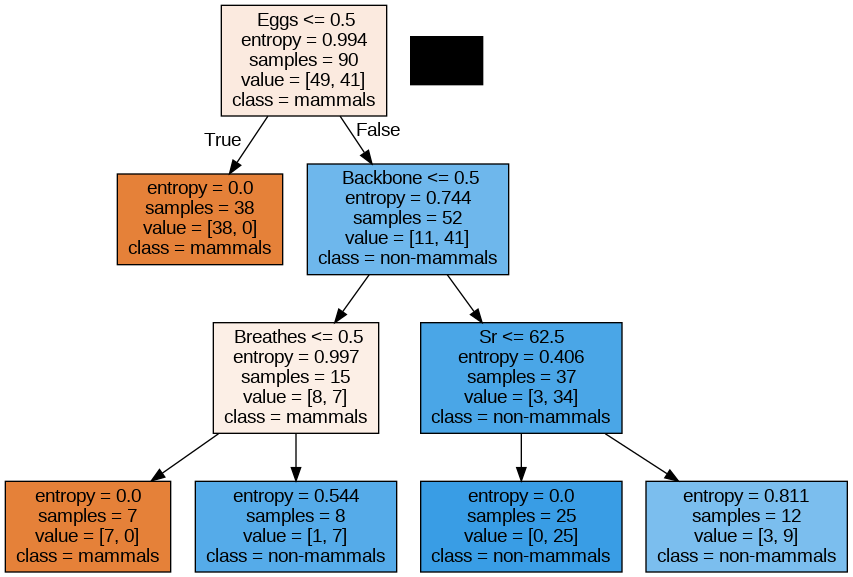

In [33]:
image=Image(graph.create_png())
image

In [34]:
testData=[['gila monister',0,0,0,0,1,1,'non-mammals'],
         ['platypus',1,0,0,0,1,0,'mammals'],
         ['owl',1,0,0,1,1,0,'non-mammals'],
         ['dolphin',1,1,1,0,0,0,'mammals']]

testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 0, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [35]:
data.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')